# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [11]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [13]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

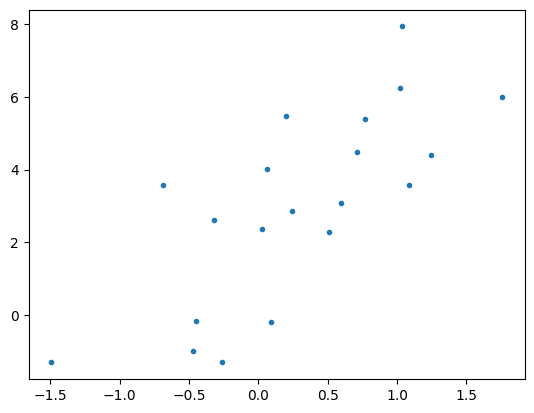

In [14]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [3]:
from sklearn.model_selection import train_test_split

X = np.array([0.70846042, -0.68388789, 1.03780474, 1.08334621, 0.77026309,
              0.19722004, -0.46819526, -0.45270204, 0.02362673, 0.06549472,
              0.08898416, 0.59424455, -0.26400365, 0.2456922, 0.5114847,
              -0.31604016, -1.49329364, 1.24112288, 1.01993764, 1.75634392])
Y = np.array([4.49682518, 3.5737603, 7.93568197, 3.58719009, 5.38341441,
              5.47930021, -0.9861325, -0.15686681, 2.36963799, 4.01600211,
              -0.20329642, 3.07728831, -1.30408343, 2.84796441, 2.27915787,
              2.62078689, -1.2855133, 4.39242028, 6.24385669, 6.00822241])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(X_train)
print(Y_train)
print(X_test)
print(Y_test)


[ 0.19722004  0.59424455  1.08334621  1.01993764 -1.49329364  0.2456922
  1.03780474  0.06549472  1.75634392  0.77026309 -0.26400365 -0.45270204
  0.08898416  0.5114847  -0.46819526]
[ 5.47930021  3.07728831  3.58719009  6.24385669 -1.2855133   2.84796441
  7.93568197  4.01600211  6.00822241  5.38341441 -1.30408343 -0.15686681
 -0.20329642  2.27915787 -0.9861325 ]
[ 0.70846042  1.24112288 -0.31604016 -0.68388789  0.02362673]
[4.49682518 4.39242028 2.62078689 3.5737603  2.36963799]


### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# 训练四个不同次数的多项式回归模型，并计算 MSE
for degree in range(1, 5):
    # 构造特征矩阵
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly.fit_transform(X_test.reshape(-1, 1))
    
    # 训练模型
    model = LinearRegression()
    model.fit(X_poly_train, Y_train)
    
    # 计算 MSE
    mse_train = mean_squared_error(Y_train, model.predict(X_poly_train))
    mse_test = mean_squared_error(Y_test, model.predict(X_poly_test))
    
    # 输出 MSE 值
    print(f"Degree {degree} train MSE: {mse_train:.2f}, test MSE: {mse_test:.2f}")

Degree 1 train MSE: 3.03, test MSE: 3.86
Degree 2 train MSE: 3.02, test MSE: 3.92
Degree 3 train MSE: 2.39, test MSE: 6.98
Degree 4 train MSE: 2.37, test MSE: 7.78


### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# 训练四个不同次数的多项式回归模型，并计算 MSE
for degree in range(1, 5):
    # 构造特征矩阵
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly.fit_transform(X_test.reshape(-1, 1))
    
    # 训练模型
    model = LinearRegression()
    model.fit(X_poly_train, Y_train)
    
    # 计算 MSE
    mse_train = mean_squared_error(Y_train, model.predict(X_poly_train))
    mse_test = mean_squared_error(Y_test, model.predict(X_poly_test))
    
    # 输出 MSE 值
    print(f"Degree {degree} Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")

Degree 1 Train MSE: 3.03, Test MSE: 3.86
Degree 2 Train MSE: 3.02, Test MSE: 3.92
Degree 3 Train MSE: 2.39, Test MSE: 6.98
Degree 4 Train MSE: 2.37, Test MSE: 7.78


1.2和1.3的答案是否相同？两者的异同有什么意义？


两者的答案可能不同，因为训练数据集和测试数据集之间的分布情况可能不同，从而导致模型的拟合效果出现差异。因此，在进行模型选择时，不仅需要考虑训练数据集的表现，还需要通过测试数据集的表现来衡量模型的泛化能力和预测性能。

在实际的机器学习任务中，为了避免过拟合，需要使用交叉验证等技术来进一步评估和调整模型。具体而言，可以将数据集划分为多个互不重叠的子集，然后利用每个子集轮流作为测试集，剩余的子集作为训练集，进行多次训练和测试，最终综合考虑所有训练-测试组合取得的评估指标，来选择最优的模型。

因此，模型选择和评估是机器学习中非常重要的环节，需要综合考虑多个因素，包括模型的复杂度、泛化能力、预测性能、解释性等，以及具体的应用需求和场景。

## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

ReLU函数的公式为：


$$f(x) = \max(0, x)$$


Sigmoid函数的公式为：


$$f(x) = \frac{1}{1 + e^{-x}}$$
整个神经网络的公式可以表示为：


$$\boldsymbol{y} = f(\boldsymbol{W}^{(L)}f(\boldsymbol{W}^{(L-1)}f(\cdots f(\boldsymbol{W}^{(1)}\boldsymbol{x} + \boldsymbol{b}^{(1)})\cdots) + \boldsymbol{b}^{(L-1)}) + \boldsymbol{b}^{(L)})$$


其中，$\boldsymbol{x}$为输入向量，$\boldsymbol{y}$为输出向量，$f$为激活函数，$\boldsymbol{W}^{(l)}$和$\boldsymbol{b}^{(l)}$分别为第$l$层的权重矩阵和偏置向量，$L$为神经网络的层数。





### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [18]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [20]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [21]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [23]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [25]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [27]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [29]:
b2 = np.array([[0.277288]])

根据给定的数据，可以进行如下的正向传播计算：

In [18]:
import numpy as np

# 定义激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 定义输入、参考输出和参数
X = np.array([[-0.05025071,  1.12345037],
              [-1.2771336 , -0.03387919],
              [-0.06085093,  0.83960333],
              [ 0.26666122, -0.15723225]])
Y = np.array([[ 0.34942997],
              [ 0.09796396],
              [ 1.80617515],
              [-0.50698293]])
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
               [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])
W2 = np.array([[ 0.8173788 ],
               [-0.01165333],
               [ 1.10703394],
               [ 0.90372372],
               [ 0.86510315]])
b2 = np.array([[0.277288]])

# 计算第一层输出
Z1 = np.dot(X, W1) + b1
A1 = sigmoid(Z1)

# 计算第二层输出
Z2 = np.dot(A1, W2) + b2
Y_pred = Z2

# 计算损失值
L = np.mean((Y - Y_pred)**2)

# 打印输出
print("Y_pred =\n", Y_pred)
print("L =", L)




Y_pred =
 [[2.18514844]
 [1.35081552]
 [2.09965131]
 [1.98338406]]
L = 2.80688883177308


其中，Y_pred为输出预测值，L为损失值。

### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

可以求出如下偏导数

In [19]:
# 计算第二层误差
dZ2 = Y_pred - Y
dW2 = np.dot(A1.T, dZ2) / len(X)
dB2 = np.mean(dZ2, axis=0, keepdims=True)

# 计算第一层误差
dZ1 = np.dot(dZ2, W2.T) * A1 * (1 - A1)
dW1 = np.dot(X.T, dZ1) / len(X)
dB1 = np.mean(dZ1, axis=0)

# 打印输出
print("dW2 =\n", dW2)
print("dB2 =\n", dB2)
print("dW1 =\n", dW1)
print("dB1 =\n", dB1)

dW2 =
 [[0.60277098]
 [0.66759087]
 [0.33077943]
 [1.21303576]
 [0.53216415]]
dB2 =
 [[1.4681033]]
dW1 =
 [[-0.05031409 -0.00022773  0.0061387  -0.06444274 -0.02342132]
 [ 0.08052004 -0.00138947  0.10171317  0.03485182  0.07164728]]
dB1 =
 [ 0.22670476 -0.00341637  0.27146402  0.17985952  0.26365259]
